<a href="https://colab.research.google.com/github/MaureenGatu/Marine-Invertebrates-Classification/blob/main/Marine_Invertebrates_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the data

In [ ]:
%%capture
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#keras libraries
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#libraries for loading images
from pathlib import Path
import pathlib
import PIL
import PIL.Image

import cv2
import os


In [ ]:
#split our training data into train, test and validation set.
train_dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Augmented/'
# split_dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/'

# #Split the data
# import splitfolders

# #split the data with a 70/20/10 ratio
# splitfolders.ratio(train_dir,output = split_dir, seed = 100, ratio = (0.7,0.3), group_prefix = None)

In [ ]:
# 'Actiniaria', 'Actinoptilum_molle', 'Actinoscyphia_plebeia', 'Actinostola_capensis', 'Aequorea_spp',
# 'Africolaria_rutila',
#  'Alcyonacea', 'Amalda_bullioides', 'Anthoptilum_grandiflorum', 'Aphelodoris_sp_', 
# 'Aphrodita_alta', 'Aristeus_varidens',
#['Ascidiacea', 'Astropecten_irregularis_pontoporeus', 'Athleta_abyssicola', 'Athleta_lutosa', 'Bolocera_kerguelensis', 
#'Brissopsis_lyrifera_capensis', 'Bryozoa', 'Cavernularia_spp', 'Cephalodiscus_gilchristi',]
# ['Ceramaster_patagonicus_euryplax', 'Charonia_lampas', 'Cheilostomatida', 'Cheiraster_hirsutus', 'Chondraster_elattosis', 'Chrysaora_fulgida', 'Chrysaora_spp', 'Comanthus_wahlbergii', 'Comitas_saldanhae', 'Comitas_stolida', 
#'Cosmasterias_felipes', 'Crossaster_penicillatus', 'Cypraeovula_iutsui', 'Diplopteraster_multipes', 
#'Dipsacaster_sladeni_capensis']
# ['Echinus_gilchristi', 'Eleutherobia_variable', 'Euspira_napus', 'Exodromidia_spinosa',
# 'Exodromidia_spinosissima', 'Flabellum_(Ulocyathus)_messum', 'Funchalia_woodwardi', 7
#'Fusinus_africanae', 'Fusinus_hayesi', 'Fusitriton_magellanicus', 'Fusivoluta_pyrrhostoma', 
#'Glyphocrangon_spp', 'Goneplax_clevai', 'Granulifusus_rubrolineatus', 'Gynandrocarpa_placenta', 
#'Halcurias_capensis', 'Haliporoides_triarthrus', 'Hemiocnus_insolens',
# 'Henricia_abyssalis', 'Hermit_crab', 'Hippasteria_phrygiana', 'Holothuroidea', 'Hydrozoa_spp']#, 

In [ ]:
fish = ['Rochinia_hertwigi', 'Salpa_spp_', 'Scaphander_punctostriatus', 'Scleractinia', 'Sclerasterias_spp', 'Seafan', 'Solenocera_africana',  'Stereomastis_sculpta', 'Stylasteridae', 'Suberites_dandelenae', 'Sympagurus_dimorphus', 'Terebratulina_sp_', 'Turritella_declivis', 'Vitjazmaia_latidactyla']

In [ ]:
ls1 = ['Pasiphaea_sp._1' ,'Pecten_sulcicostatus','Philinopsis_capensis', 'Polyechinus_agulhensis', 'Pseudarchaster_tessellatus',
       'Pseudostichopus_langeae', 'Pterygosquilla_capensis', 'Rossella_antarctica']

ls2 = ['Pycnogonid_spp_', 'Spatangus_capensis', 'Synallactes_viridilimus', 'Toraster_tuberculatus','Triviella_spp_']
#, 'Turritella_declivis
print(len(ls1))
print(len(ls2))

8
5


In [ ]:
check = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Augmented'
check_dir= pathlib.Path(check)
image_counts = len(list(check_dir.glob('Pycnogonid_spp_/*')))
print('Prawns' , image_counts)

Prawns 300


In [ ]:
# Organize data into train, valid, test dirs  3076
import shutil
import random
#diseases = ['Blight', 'Common_rust', 'Gray Leaf Spot', 'SMUT500', 'healthy', 'maizestreak_aug']
os.chdir('/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Augmented/')
# if os.path.isdir('train/0/') is False: 
#     os.mkdir('train')
#     os.mkdir('valid')
#     os.mkdir('test')

for i in ls2:
    shutil.move(f'{i}', 'train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')

    valid_samples = random.sample(os.listdir(f'train/{i}'), 60)
    for j in valid_samples:
        shutil.move(f'train/{i}/{j}', f'valid/{i}')

    test_samples = random.sample(os.listdir(f'train/{i}'), 30)
    for k in test_samples:
        shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

# Get more information about the data


In [ ]:
import os
dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Augmented/valid'
lista = os.listdir(dir) # dir is your directory path
number_files = len(lista)
print(number_files)

137


In [ ]:
dirb = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Marine Invertebrates Data/test_small/test_small'
listb = os.listdir(dir)

In [ ]:
listb == lista

True

In [ ]:
kdir= pathlib.Path(dir)
image_counts = len(list(kdir.glob('Triviella_spp_/*')))
print('Validation data',image_counts)

Validation data 0


In [ ]:
#path to get document from drive.
p = Path("/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Marine Invertebrates Data/train_small/train_small") 
#Getting the directory to the train,validation and test data
train_path2 = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Split data/train'
valid_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/val'
test_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/test'
# downloading our dataset

data_dir= pathlib.Path(train_path2)
data_dir2 = pathlib.Path(valid_path)
data_dir3 = pathlib.Path(test_path)

# The total number of images present
image_counts = len(list(data_dir.glob('*/*')))
print('Training data',image_counts)

image_counts = len(list(data_dir2.glob('*/*')))
print('Validation data',image_counts)

image_counts = len(list(data_dir3.glob('*/*')))
print('Test data',image_counts)

In [ ]:
# The total number of validation images present
#data_dir= pathlib.Path(valid_path)

# image_counts = len(list(data_dir.glob('Actinoscyphia_plebeia/*')))
# print('Actinaria' , image_counts)
# image_counts = len(list(data_dir.glob('Bryozoa/*')))
# print('Bryozoa' , image_counts)
# image_counts = len(list(data_dir.glob('Isididae/*')))
# print('Isididae' , image_counts)
# image_counts = len(list(data_dir.glob('Isopods/*')))
# print('Isopods' , image_counts)
# image_counts = len(list(data_dir.glob('Philine_aperta/*')))
# print('Philine_aperta' , image_counts)
image_counts = len(list(data_dir.glob('Triviella_spp_/*')))
print('Prawns' , image_counts)



Prawns 11


##  Data Augmentation (Mark's Code)

In [ ]:
#Repeat for all classes(ps. look for a for loop to do this next time)

import albumentations as A
#from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
#from bbaug import policies
import cv2
import os
#from pascal_voc_writer import Writer
from xml.dom import minidom
import imgaug as ia
import imgaug.augmenters as iaa
import math
import random
import copy
import glob
from tqdm import tqdm
imagespath = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Split data/train/Toraster_tuberculatus/'
writepath = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Augmented/Toraster_tuberculatus/'
random.seed(7)
def readImage(filename):
    # OpenCV uses BGR channels
    img = cv2.imread(imagespath+filename)
    return img
def start():
    count = 3000
    for filename in sorted(os.listdir(imagespath)):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):
            title, ext = os.path.splitext(os.path.basename(filename))
            image = readImage(filename)
            for i in tqdm(range(0, 18)):
                img = copy.deepcopy(image)
                transform = getTransform(i)
                try:
                    transformed = transform(image=img, )
                    transformed_image = transformed['image']
                    name = title+str(count)+'.jpg'
                    cv2.imwrite(writepath+name, transformed_image)
                    count = count+1
                except:
                    print("no image has been augmented")
                    pass
def getTransform(loop):
    # Compose a complex augmentation pipeline
    augmentation_pipeline = A.Compose(
        [
            A.Resize(224,224, p=1), # Resize all images to 224
            A.HorizontalFlip(p=0.5),  # apply horizontal flip to 50% of images
            A.VerticalFlip(p=.5), # Vertical flip 50% of the images
            A.OneOf(
                [
                    # apply one of transforms to 50% of images
                    A.RandomContrast(),  # apply random contrast
                    A.RandomGamma(),  # apply random gamma
                    A.RandomBrightness(),  # apply random brightness
                ],
                p=1.0
            ),
            A.OneOf(
                [
                    # apply one of transforms to 50% images
                    A.ElasticTransform(
                        alpha=120,
                        sigma=120 * 0.05,
                        alpha_affine=120 * 0.03
                    ),
                    A.GridDistortion(),
                    A.OpticalDistortion(
                        distort_limit=2,
                        shift_limit=0.5
                    ),
                ],
                p=.5
            )
        ],
        p=1
    )
    return augmentation_pipeline
start()

100%|██████████| 18/18 [00:00<00:00, 52.58it/s]


# Training with the augmented data

## Basic CNN model

###Data Preprocessing.


In [ ]:
#creating data and resizing our images
batch_size = 50
img_height = 224
img_width = 224

In [ ]:
#augment our image to largen the number of the dataset.

train_path2 = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Split data/train'
valid_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Split data/val'
test_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/Split data/test'

data_dir= pathlib.Path(train_path2)
data_dir2 = pathlib.Path(valid_path)
data_dir3 = pathlib.Path(test_path)

In [ ]:
#validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Traing data
#training set train_ds val_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Test Data
#training set train_ds val_ds
test_path = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir3,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 574 files belonging to 137 classes.
Found 2120 files belonging to 137 classes.
Found 417 files belonging to 137 classes.


In [ ]:
# Class name attributes on our dataset
class_names = train_ds.class_names
print(class_names)

['Actiniaria', 'Actinoptilum_molle', 'Actinoscyphia_plebeia', 'Actinostola_capensis', 'Aequorea_spp', 'Africolaria_rutila', 'Alcyonacea', 'Amalda_bullioides', 'Anthoptilum_grandiflorum', 'Aphelodoris_sp_', 'Aphrodita_alta', 'Aristeus_varidens', 'Armina_sp_', 'Ascidiacea', 'Astropecten_irregularis_pontoporeus', 'Athleta_abyssicola', 'Athleta_lutosa', 'Bolocera_kerguelensis', 'Brissopsis_lyrifera_capensis', 'Bryozoa', 'Cavernularia_spp', 'Cephalodiscus_gilchristi', 'Ceramaster_patagonicus_euryplax', 'Charonia_lampas', 'Cheilostomatida', 'Cheiraster_hirsutus', 'Chondraster_elattosis', 'Chrysaora_fulgida', 'Chrysaora_spp', 'Comanthus_wahlbergii', 'Comitas_saldanhae', 'Comitas_stolida', 'Cosmasterias_felipes', 'Crossaster_penicillatus', 'Cypraeovula_iutsui', 'Diplopteraster_multipes', 'Dipsacaster_sladeni_capensis', 'Echinus_gilchristi', 'Eleutherobia_variable', 'Euspira_napus', 'Exodromidia_spinosa', 'Exodromidia_spinosissima', 'Flabellum_(Ulocyathus)_messum', 'Funchalia_woodwardi', 'Fusin

In [ ]:
# Iterating over our dataset to retrieve images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 224, 224, 3)
(50,)


In [ ]:
# import mxnet as mx 
# aug = mx.image.HorizontalFlipAug(p=1)
# aug_image = aug(Common_rust)
# plot_mx_array(aug_image)

# assert example_image.shape == (427, 640, 3)
# assert aug_image.shape == (427, 640, 3)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   train_path,
#   image_size=(224,224),
#   batch_size=10)
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   valid_path,
#   image_size=(224,224),
#   batch_size=10)

In [ ]:
# #augmentation.
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

In [ ]:
# #visualize image that has been augumented
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(2):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [ ]:
# Cache the data so that it is saved in the first epoch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Intergrate wandb

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

wandb.login()


wandb: Currently logged in as: maureengatu (use `wandb login --relogin` to force relogin)


True

## **Initial Baseline CNN Model**

Our number one concern should be **overfitting**. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions

* The main focus for fighting overfitting should be the **entropic capacity** of our model --how much information the model is allowed to store.
    * A model that can only store a few features will have to focus on the most significant features found in the data, and these are more likely to be truly relevant and to generalize better.
* One ways to modulate entropic capacity is the choice of the **number of parameters in your model**, i.e. number and size of each layer. 
* Another way is the **use of weight regularization**, such as L1 or L2 regularization, which consists in forcing model weights to taker smaller values.
* **Dropout** also helps reduce overfitting, by preventing a layer from seeing twice the exact same pattern, thus acting in a way analoguous to data augmentation

In [ ]:
# Libraries for the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
#Building our baseline model
#Compile the the model
num_classes = 137

simple_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(2048, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(4096, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(2048, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(1024, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(512, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(137, activation='softmax'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

### Initialize your wandb run

In [ ]:
# Initialize wandb with your project name
run = wandb.init(project='Marine Invertebrates Classification Challenge.',save_code= True, name='simple_cnn_originaldata',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.005,
                     "epochs": 6,
                     "batch_size": 50,
                     "layers": 4,
                     "optimizer": 'Adam',
                     "loss_function": "sparse_categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "CNN",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config  # We'll use this to configure our experiment

# Initialize model like you usually do.
tf.keras.backend.clear_session()
#model = Model()
simple_model.summary()

# Compile model like you usually do.
# Notice that we use config, so our metadata matches what gets executed
optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
simple_model.compile(optimizer, config.loss_function, metrics=['acc'])

wandb: Currently logged in as: maureengatu (use `wandb login --relogin` to force relogin)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 512)     590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 1024)      4719616   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 1024)      0

In [ ]:
# #fit the model
history = simple_model.fit(train_ds,
          epochs=config.epochs, 
          batch_size=config.batch_size,
          validation_data=val_ds,
          callbacks=[WandbCallback()])

run.finish()

Epoch 1/6
 2/43 [>.............................] - ETA: 3:39:39 - loss: 10.7290 - acc: 0.0000e+00

Exception in thread Thread-29:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_run.py", line 215, in check_status
    status_response = self._interface.communicate_stop_status()
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface.py", line 737, in communicate_stop_status
    resp = self._communicate(req, timeout=timeout, local=True)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface.py", line 539, in _communicate
    return self._communicate_async(rec, local=local).get(timeout=timeout)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/interface/interface.py", line 544, in _communicate_async
    raise Exception("The wandb backend process has shutdown")
Exception: The wandb backend process has

In [ ]:
# #Create plots of loss and accuracy on the training and validation sets

# acc = history.history['acc']
# val_acc = history.history['val_acc']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


## Mobilenet 
    (Train/Validation/Test Split)
  
  [encoding](https://www.damienpontifex.com/posts/images-with-directories-as-labels-for-tensorflow-data/)

In [ ]:
# # Organize data into train, valid, test dirs  3076

# diseases = ['Blight', 'Common_rust', 'Gray Leaf Spot', 'SMUT500', 'healthy', 'maizestreak_aug']
# os.chdir('/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images')
# if os.path.isdir('train/0/') is False: 
#     os.mkdir('train')
#     os.mkdir('valid')
#     os.mkdir('test')

#     for i in diseases:
#         shutil.move(f'{i}', 'train')
#         os.mkdir(f'valid/{i}')
#         os.mkdir(f'test/{i}')

#         valid_samples = random.sample(os.listdir(f'train/{i}'), 100)
#         for j in valid_samples:
#             shutil.move(f'train/{i}/{j}', f'valid/{i}')

#         test_samples = random.sample(os.listdir(f'train/{i}'), 20)
#         for k in test_samples:
#             shutil.move(f'train/{i}/{k}', f'test/{i}')
# os.chdir('../..')

### MobileNet Data Processing

In [ ]:
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
tf.random.set_seed(1000)

In [ ]:
#Getting the directory to the train,validation and test data
train_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/train'
valid_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/val'
test_path = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/test'


#Preprocessing the data for MobileNet architecture

#Train data
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)


#Validation data
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)

#Test data
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 21935 images belonging to 137 classes.
Found 6244 images belonging to 137 classes.
Found 3227 images belonging to 137 classes.


### Transfer Model

In [ ]:
#download the MobileNet model
mobile = tf.keras.applications.mobilenet.MobileNet()

#summary of the model
mobile.summary()

* We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

* By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last global_average_pooling layer.

In [ ]:
#Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
#his setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has 88 layers total.

x = mobile.layers[-6].output

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=137, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model '.',save_code= True, name='simple_cnn_originaldata',
run = wandb.init(project='Marine Invertebrates Classification Challenge',save_code= True, name='MobileNet_Baldata_model',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 10,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
2194/2194 - 2552s - loss: 1.1946 - acc: 0.7618 - val_loss: 0.2761 - val_acc: 0.9488
Epoch 2/10
2194/2194 - 1229s - loss: 0.2488 - acc: 0.9571 - val_loss: 0.1313 - val_acc: 0.9734
Epoch 3/10
2194/2194 - 1245s - loss: 0.1131 - acc: 0.9847 - val_loss: 0.0875 - val_acc: 0.9797
Epoch 4/10


### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model')

cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
wandb.log({'confusion_matrix':cm})

wandb.finish()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


In [ ]:
# make a prediction with the test dataset
for images_batch, labels_batch in test_path.take(1):

  plt.imshow(images_batch[0].numpy().astype('uint8')) # print(images_batch[0]) returns tensors. Use .numpy() to change to numpy

In [ ]:
# Import numpy
import numpy as np

# make a prediction with the test dataset
for images_batch, labels_batch in test_path.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label:", class_names[first_label])

  # Create a predicted image
  batch_prediction = model.predict(image_batch) # Prediction for 32 labels
  print(f"Predicted label: {class_names[np.argmax(batch_prediction[0])]}")

In [ ]:
# build a fuction that takes model and image as input 
# and returns predicted class and confidence
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) # convert an image into image array
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array) # call predict function to predict the image array

  predicted_class = class_names[np.argmax(predictions[0])] # get the best predicted class
  confidence = round(100 * (np.max(predictions[0])), 2) # create a confidence for the predictions
  return predicted_class, confidence # Confidence means accuracy of the prediction is 100%

In [ ]:
# predict 9 images using the function above
plt.figure(figsize=(15,17)) # Increase the figure size
for images, labels in test_path.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1) # Use a subplot function to display all the nine predicted images
    plt.imshow(images[i].numpy().astype("uint8"))
    
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")

    plt.axis = "off" # Remove the axis values

In [ ]:
# Create a folder in your local machine and save your model using the code below
model_version=1
model.save(f"../models{model_version}")

In [ ]:
# Saving the model
import tensorflow as tf
from keras.models import load_model
model.save('MobileNet_Epoch_20')
model.save('MobileNet_Epoch_20.h5')
model.save('MobileNet_Epoch_20.js')
model.save('MobileNet_Epoch_20.pd')

* We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

* By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last global_average_pooling layer.

In [ ]:
#Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
#his setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has 88 layers total.

x = mobile.layers[-6].output

#### **create an output layer**

In [ ]:
#create an output layer that we're calling output, 
#which will just be a Dense layer with 6 output nodes for the ten corresponding classes,
# we'll use the softmax activation function.

output = Dense(units=6, activation='softmax')(x)

In [ ]:
#construct the new fine-tuned model
model = keras.Model(inputs=mobile.input, outputs=output)

* To build the new model, we create an instance of the Model class and specify the inputs to the model to be equal to the input of the original MobileNet
* Then we define the outputs of the model to be equal to the output variable we created directly above.
* This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer.


In [ ]:
#choose how many layers we actually want to be trained when we train on our new data set.

#we train the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

* So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.


In [ ]:
#Looking at the model summary to see the new model architecture, along with how the number of trainable parameters.

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
#compile the model
#wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_basemodel') 
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 10,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

In [ ]:
test_labels_2 = test_path.classes
predictions_2 = model.predict(x=test_batches, steps=len(test_path), verbose=0)

In [ ]:
tf.keras.applications.MobileNetV3Small(
    input_shape=None, alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, classes=1000, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax',
    include_preprocessing=True
)

### Increase Epoch

In [ ]:
# fit() to train the model
run = wandb.init(project='CNN Classification Model',save_code= True, name='MobileNet_Bal_model_epoch50',
            config={  # and include hyperparameters and metadata
                     "learning_rate": 0.0001,
                     "epochs": 50,
                    "optimizer":"Adam",
                    "metric": 'Accuracy',
                     "loss_function": "categorical_crossentropy", #CategoricalCrossentropy
                     "architecture": "ModelNet Model",
                     "dataset": "Maize Crop images"
                 })
config = wandb.config 


optimizer = tf.keras.optimizers.Adam(lr=config.learning_rate)
model.compile(optimizer, loss=config.loss_function, metrics=['acc'])


history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=config.epochs, callbacks=[WandbCallback()],
            verbose=2
)
run.finish()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
300/300 - 27s - loss: 1.6690 - acc: 0.6950 - val_loss: 1.3431 - val_acc: 0.7530
Epoch 2/50
300/300 - 24s - loss: 1.0148 - acc: 0.7500 - val_loss: 1.0265 - val_acc: 0.7879
Epoch 3/50
300/300 - 24s - loss: 0.8067 - acc: 0.7807 - val_loss: 0.8043 - val_acc: 0.8061
Epoch 4/50
300/300 - 23s - loss: 0.6029 - acc: 0.8083 - val_loss: 0.6877 - val_acc: 0.8152
Epoch 5/50
300/300 - 23s - loss: 0.5315 - acc: 0.8300 - val_loss: 0.5913 - val_acc: 0.8258
Epoch 6/50
300/300 - 23s - loss: 0.4649 - acc: 0.8437 - val_loss: 0.5325 - val_acc: 0.8424
Epoch 7/50
300/300 - 23s - loss: 0.3935 - acc: 0.8567 - val_loss: 0.4851 - val_acc: 0.8485
Epoch 8/50
300/300 - 23s - loss: 0.3672 - acc: 0.8600 - val_loss: 0.4446 - val_acc: 0.8530
Epoch 9/50
300/300 - 23s - loss: 0.3212 - acc: 0.8767 - val_loss: 0.4272 - val_acc: 0.8515
Epoch 10/50
300/300 - 23s - loss: 0.2943 - acc: 0.8867 - val_loss: 0.3976 - val_acc: 0.8606
Epoch 11/50
300/300 - 23s - loss: 0.2568 - acc: 0.9087 - val_loss: 0.3821 - val_acc: 0.86

acc,0.99333
best_epoch,22
best_val_loss,0.31673
epoch,49
loss,0.02113
val_acc,0.89848
val_loss,0.38882


acc,▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▃▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████▇█▇█▇███
val_loss,█▆▄▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


### Model confusion Matrix

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#wandb.log({'confusion_matrix':cm})

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches.class_indices

{'Blight': 0,
 'Common_rust': 1,
 'Gray Leaf Spot': 2,
 'SMUT500': 3,
 'healthy': 4,
 'maizestreak_aug': 5}

Confusion matrix, without normalization
[[22  1  4  0  0  3]
 [ 1 25  4  0  0  0]
 [ 1  2 27  0  0  0]
 [ 0  0  0 29  0  1]
 [ 0  0  0  0 30  0]
 [ 0  0  0  0  0 30]]


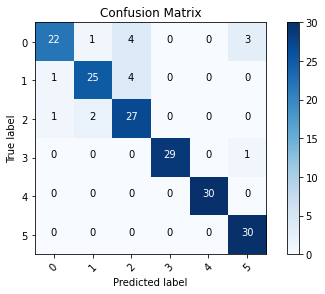

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Classification report
print(classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.89      0.83      0.86        30
           2       0.77      0.90      0.83        30
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        30
           5       0.88      1.00      0.94        30

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.90       180
weighted avg       0.91      0.91      0.90       180



we saved the best model 

In [ ]:
#saving the model
from keras.models import load_model

model.save('mobile_model')

INFO:tensorflow:Assets written to: mobile_model/assets


# Vit

# Libraries & Data Importation

In [ ]:
%%capture
!pip install einops
!pip install transformers
!pip install vit-pytorch linformer

!pip install wandb

In [ ]:
# import wandb
# from wandb.keras import WandbCallback

# wandb.login()

[resource](https://github.com/pytorch/vision/blob/6b071be9da221998c9ba4173fb5e4186dabdc9fe/torchvision/datasets/folder.py#L65) , [optimizers](https://pytorch.org/docs/stable/optim.html), [HuggiFace](https://huggingface.co/transformers/model_doc/vit.html), [Guide](https://colab.research.google.com/drive/1Y_RkKMr-pxGfoYbqUoYlE6HW3WHZDOFx), [Fine-tuning](https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_the_%F0%9F%A4%97_Trainer.ipynb#scrollTo=HimhtFgIxEfg).

In [ ]:
import torch
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

import einops
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary


import torch.nn as nn
import torch.nn.functional as F

# loading Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1000)

# import Linformer
from linformer import Linformer   
import glob   
from PIL import Image
from itertools import chain   
from vit_pytorch.efficient import ViT   
from tqdm.notebook import tqdm   
from __future__ import print_function

# import torch and related libraries
import torch   
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms   
from torch.optim.lr_scheduler import StepLR, ExponentialLR  
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms 
from torchvision.transforms import ToTensor


#sklearn to split the data

from sklearn.model_selection import train_test_split

## Position Embedding

* So far, the model has no idea about the original position of the patches.
* We need to pass this spatial information. 
* This can be done in different ways, in ViT we let the model learn it. 
* The position embedding is just a tensor of shape N_PATCHES + 1 (token), EMBED_SIZE that is added to the projected patches.

In [ ]:
# class PatchEmbedding(nn.Module):
#     def __init__(self, in_channels: int = 3, patch_size: int = 16, emb_size: int = 768, img_size: int = 224):
#         self.patch_size = patch_size
#         super().__init__()
#         self.projection = nn.Sequential(
#             # using a conv layer instead of a linear one -> performance gains
#             nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
#             Rearrange('b e (h) (w) -> b (h w) e'),
#         )
#         self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
#         self.positions = nn.Parameter(torch.randn((img_size // patch_size) **2 + 1, emb_size))

        
#     def forward(self, x: Tensor) -> Tensor:
#         b, _, _, _ = x.shape
#         x = self.projection(x)
#         cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=b)
#         # prepend the cls token to the input
#         x = torch.cat([cls_tokens, x], dim=1)
#         # add position embedding
#         x += self.positions
#         return x
    
# PatchEmbedding()(x).shape

# #We added the position embedding in the .positions field and sum it to the patches in the .forward function

torch.Size([1, 197, 768])

In [ ]:
# To implement Transformer in ViT only the Encoder is used

# Linformer
      * Adam Optimizer
      * lr = 3e-5

In [ ]:
#Install the ViT PyTorch package and Linformer
%%capture
!pip install vit-pytorch linformer

In [ ]:
# loading Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Linformer
from linformer import Linformer   
import glob   
from PIL import Image
from itertools import chain   
from vit_pytorch.efficient import ViT   
from tqdm.notebook import tqdm   
from __future__ import print_function

# import torch and related libraries
import torch   
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms   
from torch.optim.lr_scheduler import StepLR, ExponentialLR  
from torch.utils.data import DataLoader, Dataset

#sklearn to split the data

from sklearn.model_selection import train_test_split

In [ ]:
#definining batch size, epocs, learning rate and gamma for training 

batch_size = 12     #***
epochs = 10
lr = 3e-5
gamma = 0.7 #for learning rate scheduler  #***

In [ ]:
#Load data

train_dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/train'
test_dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/test'
valid_dir = '/content/drive/MyDrive/Data Science/Marine Invertebrates Classification Challenge/Data/augmented_split/val'


# Torch transforms
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)
val_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)
test_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)



train_data = datasets.ImageFolder(train_dir, transform=train_transforms)

valid_data = datasets.ImageFolder(valid_dir, transform=val_transforms)

test_data = datasets.ImageFolder(test_dir, transform=val_transforms)


print(f"Train Data: {len(train_data)}")
print(f"Test Data: {len(valid_data)}")
print(f"Test Data: {len(test_data)}")


train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)

FileNotFoundError: ignored

In [ ]:
imagespath = '/content/drive/MyDrive/MOG/DATA/Datasets/Augment Images/train/Blight'
img = 
for filename in sorted(os.listdir(imagespath)):
  if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".JPEG") or filename.endswith(".JPG"):
    label = imagespath.split('/')[-2]
label

'train'

In [ ]:
batch_size = 64
epochs = 20
lr = 3e-5
gamma = 0.7 #for learning rate scheduler 

In [ ]:
efficient_transformer = Linformer(
    dim=128,
    seq_len=49+1,  # 7x7 patches + 1 cls-token
    depth=12, #***
    heads=8,#***
    k=64  #2nd dimention of the p_bar matrix
)

In [ ]:
#Visual transformer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViT(
    dim=128,
    image_size=224,
    patch_size=32,  #***
    num_classes=6,
    transformer=efficient_transformer,
    channels=3,
).to(device)

In [ ]:
# loss function

criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.Adam(model.parameters(), lr=lr)

# scheduler

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [ ]:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)
    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)
            val_output = model(data)
            val_loss = criterion(val_output, label)
            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)
    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )